# Cluster Hierárquico - Shopping Data

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
import numpy as np

In [2]:
#Para importar o conjunto de dados para este exemplo, execute o seguinte código:
customer_data = pd.read_csv('./shopping-data.csv')

In [3]:
#Vamos explorar um pouco o nosso conjunto de dados.
#Para verificar o número de registros e atributos, execute o seguinte script:
#O script retornará, o (200, 5)que significa que o conjunto de dados contém 200 registros e 5 atributos.


In [4]:
customer_data.shape

(200, 5)

In [5]:
#Para observar o conjunto de dados, execute a head()função do quadro de dados. Dê uma olhada no seguinte script:

In [6]:
customer_data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


Nosso conjunto de dados possui cinco colunas: Código do cliente, Gênero, Idade, Renda anual e Pontuação de gastos.

Para visualizar os resultados no espaço de recurso bidimensional, reteremos apenas duas dessas cinco colunas.
Podemos remover a coluna Código do cliente, Gênero e Idade.

Reteremos as colunas Renda anual (em milhares de dólares) e Pontuação de gastos (1-100).

A coluna Pontuação de gastos significa com que frequência uma pessoa gasta dinheiro em um shopping em uma escala de 1 a 100, sendo 100 o maior gasto.


In [7]:
#Filtrar as três primeiras colunas do nosso conjunto de dados:
data = customer_data.iloc[:, 3:5].values

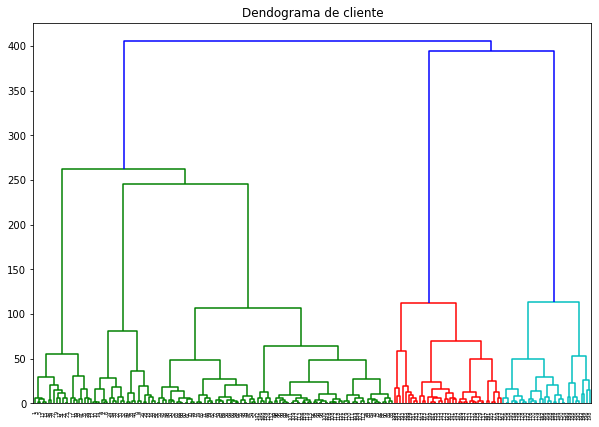

In [8]:
#Em seguida, precisamos conhecer os clusters nos quais queremos que nossos dados sejam divididos.
#Usaremos novamente a biblioteca scipy  para criar os dendogramas para nosso conjunto de dados.
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10, 7))
plt.title("Dendograma de cliente")
dend = shc.dendrogram(shc.linkage(data, method='ward'))

Agora que sabemos o número de clusters para nosso conjunto de dados, a próxima etapa é agrupar os pontos de dados nesses cinco clusters.
Para fazer isso, usaremos novamente a AgglomerativeClustering da sklearn.

Informa a quantidade de cluster, tipo da distância utilizada.
O linkage é definido como "ward", o que minimiza a variante entre os clusters.

In [9]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
#A próxima etapa é importar a classe para cluster e chamar seu fit_predict, método para prever os clusters aos quais cada ponto de dados pertence.
cluster.fit_predict(data)

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2])

Você pode ver os rótulos do cluster de todos os seus pontos de dados.
Como tínhamos cinco clusters, temos cinco rótulos na saída, ou seja, 0 a 4.

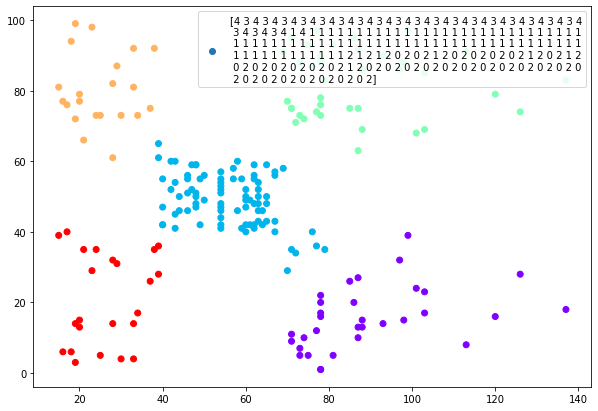

In [12]:
#Como etapa final, vamos plotar os clusters para ver como, na verdade, nossos dados foram agrupados:
plt.figure(figsize=(10, 7))
plt.scatter(data[:,0], data[:,1], c=cluster.labels_, cmap='rainbow')
# insere legenda
plt.legend(loc=1)

Características do gráfico
1. Você pode ver os pontos de dados na forma de cinco clusters.
2. Os pontos de dados no canto inferior direito pertencem aos clientes com altos salários, mas baixos gastos.
3. Estes são os clientes que gastam seu dinheiro com cuidado.
4. Da mesma forma, os clientes no canto superior direito (pontos de dados ecológicos), são clientes com altos salários e altos gastos. Esse é o tipo de clientes que as empresas têm como alvo.
5. Os clientes no meio (pontos de dados azuis) são os que têm renda e salários médios.
6. O maior número de clientes pertence a esta categoria.
7. As empresas também podem segmentar esses clientes, pois eles são em grande número, etc.